In [4]:
# 311 Machine Learning HW 3
# Rowan Mascarenhas - ID: 1797865 - 2/26/24

import pandas # https://pandas.pydata.org/
from pandas.plotting import scatter_matrix

from sklearn import model_selection # for model comparisons

import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt  # https://matplotlib.org/
import seaborn as sns

import warnings

# algorithms
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_blobs
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn import svm

# assessment
from sklearn import model_selection # for model comparisons
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.neural_network import MLPClassifier

# algorithms
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor

from sklearn.datasets import make_classification
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [5]:
# Setup: Set up training and testing datasets, predicting 'quality' based on all other values

dataset = pandas.read_csv('winequality-white.csv')
dataset = dataset.dropna()
X_name = [ 'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide','total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']
y_name = 'quality'
X = dataset[X_name]   
y = dataset[y_name]   
# -----------------------------------------------------------------------------------------------------------------------
seed = 42 
test_size = 0.20
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=test_size, random_state=seed)

print('done \n')

done 



In [6]:
# Problem 1 - Default
mlp = MLPClassifier(hidden_layer_sizes=(8,), # one hidden layer with 50 neurons
                    activation = 'relu',  # ReLU is the default option
                    # solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init = 0.1 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=10,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )

# Train the classifier
# NOTE: this example won't converge because our max_iter choice is too few epochs 
# (otherwise it will take too long for a live demo), 
# so we catch the warning and ignore it here
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

Iteration 1, loss = 11.13994300
Iteration 2, loss = 1.55104462
Iteration 3, loss = 1.32160231
Iteration 4, loss = 1.30162305
Iteration 5, loss = 1.29762973
Iteration 6, loss = 1.29577374
Iteration 7, loss = 1.29513274
Iteration 8, loss = 1.29502109
Iteration 9, loss = 1.29509431
Iteration 10, loss = 1.29452598
Training set score: 0.450740
Done


In [5]:
# Problem 1 - Changed neurons per layer
mlp = MLPClassifier(hidden_layer_sizes=(8,8), # one hidden layer with 50 neurons
                    activation = 'relu',  # ReLU is the default option
                    # solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init = 0.1 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=10,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )

# Train the classifier
# NOTE: this example won't converge because our max_iter choice is too few epochs 
# (otherwise it will take too long for a live demo), 
# so we catch the warning and ignore it here
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

#

Iteration 1, loss = 3.16297468
Iteration 2, loss = 1.31288768
Iteration 3, loss = 1.29844727
Iteration 4, loss = 1.29524019
Iteration 5, loss = 1.29418658
Iteration 6, loss = 1.29367204
Iteration 7, loss = 1.29360748
Iteration 8, loss = 1.29376302
Iteration 9, loss = 1.29375827
Iteration 10, loss = 1.29384415
Training set score: 0.450740
Done


In [4]:
# Problem 1 - Activation set to logistic
mlp = MLPClassifier(hidden_layer_sizes=(8,), # one hidden layer with 50 neurons
                    activation = 'logistic',  # ReLU is the default option
                    # solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init = 0.1 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=10,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )

# Train the classifier
# NOTE: this example won't converge because our max_iter choice is too few epochs 
# (otherwise it will take too long for a live demo), 
# so we catch the warning and ignore it here
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

# Iteration 1 is much more precise, but loss improvements are less in later iterations.

Iteration 1, loss = 1.37029594
Iteration 2, loss = 1.30624412
Iteration 3, loss = 1.30178590
Iteration 4, loss = 1.31713444
Iteration 5, loss = 1.30246017
Iteration 6, loss = 1.30796368
Iteration 7, loss = 1.30607442
Iteration 8, loss = 1.30552029
Iteration 9, loss = 1.32124920
Iteration 10, loss = 1.30954403
Training set score: 0.450740
Done


In [3]:
# Problem 2 - with solver
mlp = MLPClassifier(hidden_layer_sizes=(8,), # one hidden layer with 50 neurons
                    activation = 'relu',  # ReLU is the default option
                    solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init = 0.1 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=10,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )

# Train the classifier
# NOTE: this example won't converge because our max_iter choice is too few epochs 
# (otherwise it will take too long for a live demo), 
# so we catch the warning and ignore it here
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

# With solver, reults are magninally better than Problem 1 default. Iterations 4-10 are all under 1.3, and see marginal improvements, as apposed to fluctuating around 1.3

Iteration 1, loss = 3.77714882
Iteration 2, loss = 2.06265328
Iteration 3, loss = 2.12305077
Iteration 4, loss = 2.12625575
Iteration 5, loss = 2.12480870
Iteration 6, loss = 2.12369741
Iteration 7, loss = 2.12301243
Iteration 8, loss = 2.12195300
Iteration 9, loss = 2.12216674
Iteration 10, loss = 2.12145630
Training set score: 0.450740
Done


In [7]:
# Problem 2 - with solver + default no. of epochs
mlp = MLPClassifier(hidden_layer_sizes=(8,), # one hidden layer with 50 neurons
                    activation = 'relu',  # ReLU is the default option
                    solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init = 1 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=200,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )

# Train the classifier
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

# Increasing epoch count to 200 had very minimal difference from normal, epoch count can be less than 10, even 2 iterations should be enough, probably due to the high learning rate

Iteration 1, loss = 1.75789502
Iteration 2, loss = 1.30043806
Iteration 3, loss = 1.30097303
Iteration 4, loss = 1.30314309
Iteration 5, loss = 1.30009734
Iteration 6, loss = 1.30147690
Iteration 7, loss = 1.30044188
Iteration 8, loss = 1.29960766
Iteration 9, loss = 1.30159659
Iteration 10, loss = 1.29940777
Iteration 11, loss = 1.30180688
Iteration 12, loss = 1.30070878
Iteration 13, loss = 1.29919266
Iteration 14, loss = 1.29980483
Iteration 15, loss = 1.29766829
Iteration 16, loss = 1.30038200
Iteration 17, loss = 1.30059139
Iteration 18, loss = 1.30240588
Iteration 19, loss = 1.30229207
Iteration 20, loss = 1.30148765
Iteration 21, loss = 1.29968002
Iteration 22, loss = 1.29982644
Iteration 23, loss = 1.30242760
Iteration 24, loss = 1.29916616
Iteration 25, loss = 1.30016742
Iteration 26, loss = 1.29926938
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Training set score: 0.450740
Done


In [8]:
# Problem 2 - with solver + default learning rate
mlp = MLPClassifier(hidden_layer_sizes=(8,8), # one hidden layer with 50 neurons
                    activation = 'relu',  # ReLU is the default option
                    solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init = 0.001 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=200,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )

# Train the classifier
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

# This had the biggest difference in loss. To compensate for the decreased learning rate, we needed more iterations, but even with 200 iterations, loss is still not as good as prior results.

Iteration 1, loss = 2.21397971
Iteration 2, loss = 1.89994132
Iteration 3, loss = 1.85944131
Iteration 4, loss = 1.82043185
Iteration 5, loss = 1.78247121
Iteration 6, loss = 1.74346192
Iteration 7, loss = 1.70410941
Iteration 8, loss = 1.66518161
Iteration 9, loss = 1.62648043
Iteration 10, loss = 1.58809472
Iteration 11, loss = 1.55231128
Iteration 12, loss = 1.51838209
Iteration 13, loss = 1.48640902
Iteration 14, loss = 1.45814610
Iteration 15, loss = 1.43337380
Iteration 16, loss = 1.41121822
Iteration 17, loss = 1.39163127
Iteration 18, loss = 1.37442247
Iteration 19, loss = 1.35989706
Iteration 20, loss = 1.34636723
Iteration 21, loss = 1.33531435
Iteration 22, loss = 1.32560326
Iteration 23, loss = 1.31799033
Iteration 24, loss = 1.31179474
Iteration 25, loss = 1.30709549
Iteration 26, loss = 1.30358819
Iteration 27, loss = 1.30090386
Iteration 28, loss = 1.29874067
Iteration 29, loss = 1.29682633
Iteration 30, loss = 1.29545565
Iteration 31, loss = 1.29404137
Iteration 32, los

In [9]:
# Problem 3: Optimal combination to minimize loss
mlp = MLPClassifier(hidden_layer_sizes=(8,8), # one hidden layer with 50 neurons
                    activation = 'relu',  # ReLU is the default option
                    # solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init = 0.1 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=15,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )

# Train the classifier
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

# The default state results in the best overall results. Iteration 1 has minimal loss, and there are small improvments later on. We only need ~15 iterations before we see a loss of ~1.17, which is the best so far.
# Scaoring based on finding the best loss rate on a single iteration, this is it.

Iteration 1, loss = 1.51048019
Iteration 2, loss = 1.31687090
Iteration 3, loss = 1.28439071
Iteration 4, loss = 1.24240017
Iteration 5, loss = 1.20168733
Iteration 6, loss = 1.19678799
Iteration 7, loss = 1.18913666
Iteration 8, loss = 1.18582245
Iteration 9, loss = 1.18679537
Iteration 10, loss = 1.18529489
Iteration 11, loss = 1.18510299
Iteration 12, loss = 1.17564209
Iteration 13, loss = 1.17971391
Iteration 14, loss = 1.20080475
Iteration 15, loss = 1.20224367
Training set score: 0.465799
Done


In [10]:
# Problem 3: Optimal combination to get the bet training score
mlp = MLPClassifier(hidden_layer_sizes=(9,8), # one hidden layer with 50 neurons
                    activation = 'relu',  # ReLU is the default option
                    # solver='sgd',  # default is Adam
                    alpha=1e-4,  # regulariztion parameter, set to default=0.0001 (increase up to 1.0 for stronger regularization)
                    learning_rate_init = 0.1 ,  # initial step-size for updating the weights, default is 0.001
                    max_iter=8,  # number of epochs, default=200
                    random_state=42,
                    verbose=10, 
                    )

# Train the classifier
# NOTE: this example won't converge because our max_iter choice is too few epochs 
# (otherwise it will take too long for a live demo), 
# so we catch the warning and ignore it here
from sklearn.exceptions import ConvergenceWarning
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
    mlp.fit(X_train, y_train)

print("Training set score: %f" % mlp.score(X_train, y_train))
print('Done')

# For the bet training set score, changing number of layers and decreasing iterations works best. As iterations are close to accurate by iteration 3, less unnecessary iterations results in a better training score. 

Iteration 1, loss = 1.61200962
Iteration 2, loss = 1.26668347
Iteration 3, loss = 1.22554257
Iteration 4, loss = 1.21914351
Iteration 5, loss = 1.21181423
Iteration 6, loss = 1.19704647
Iteration 7, loss = 1.18373155
Iteration 8, loss = 1.19237203
Training set score: 0.497448
Done


/project/cacds/apps/anaconda3/5.0.1/lib/python3.6/site-packages/sklearn/linear_model/_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


RESULTS FOR LR
Accuracy: 0.47653061224489796


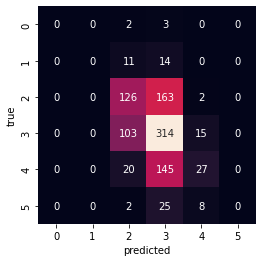

/project/cacds/apps/anaconda3/5.0.1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/cacds/apps/anaconda3/5.0.1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/cacds/apps/anaconda3/5.0.1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r


 clasification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.48      0.43      0.45       291
           6       0.47      0.73      0.57       432
           7       0.52      0.14      0.22       192
           8       0.00      0.00      0.00        35

    accuracy                           0.48       980
   macro avg       0.24      0.22      0.21       980
weighted avg       0.45      0.48      0.43       980

Cohen Kappa Score: 0.1431697639856565


RESULTS FOR KNN-distance
Accuracy: 0.6112244897959184


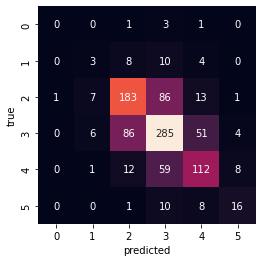


 clasification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.18      0.12      0.14        25
           5       0.63      0.63      0.63       291
           6       0.63      0.66      0.64       432
           7       0.59      0.58      0.59       192
           8       0.55      0.46      0.50        35

    accuracy                           0.61       980
   macro avg       0.43      0.41      0.42       980
weighted avg       0.60      0.61      0.61       980

Cohen Kappa Score: 0.41867380778153185


RESULTS FOR KNN-uniform
Accuracy: 0.5040816326530613


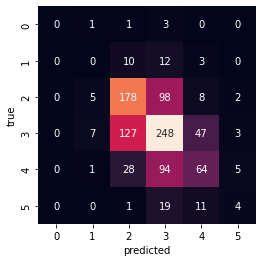


 clasification report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.00      0.00      0.00        25
           5       0.52      0.61      0.56       291
           6       0.52      0.57      0.55       432
           7       0.48      0.33      0.39       192
           8       0.29      0.11      0.16        35

    accuracy                           0.50       980
   macro avg       0.30      0.27      0.28       980
weighted avg       0.49      0.50      0.49       980

Cohen Kappa Score: 0.24263072443671974




/project/cacds/apps/anaconda3/5.0.1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/cacds/apps/anaconda3/5.0.1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/project/cacds/apps/anaconda3/5.0.1/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [11]:
# Problem 4: Alternate Classifier
# Algorithms
models = []
models.append(('LR', LogisticRegression(random_state=seed))) # default=’lbfgs’
models.append(('KNN-distance', KNeighborsClassifier(n_neighbors=5, weights='distance'))) # default is n_neighbors=5, weights='uniform'
models.append(('KNN-uniform', KNeighborsClassifier(n_neighbors=5, weights='uniform'))) # default is n_neighbors=5, weights='uniform'

# evaluate each model in turn
results = []
names = []
for name, modelName in models:   # Select each model in turn
    modelName.fit(X_train, y_train)  # train the model on the training data
    y_predicted = modelName.predict(X_test)  # make predictions using the validation data
    # What does the error look like?
    print('RESULTS FOR '+name)  
    print('Accuracy:', accuracy_score(y_test, y_predicted))
    sns.heatmap(confusion_matrix(y_test, y_predicted), square=True, annot=True, fmt='d', cbar=False)
    plt.xlabel('predicted')
    plt.ylabel('true');
    plt.show()
    print('\n clasification report:\n', classification_report(y_test, y_predicted))
    print('Cohen Kappa Score:', cohen_kappa_score(y_test, y_predicted))
    print('\n') 
    
    # Alternate classifier, base accuracy is relatively similar to past results.

 Method: Linear 
 Mean: -0.010893 (Standard deviation of 0.754259)
 Max deviation: 4.213810



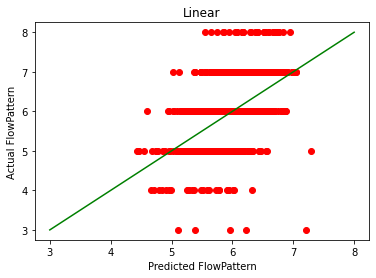

 Method: KNR 
 Mean: -0.002245 (Standard deviation of 0.799614)
 Max deviation: 3.200000



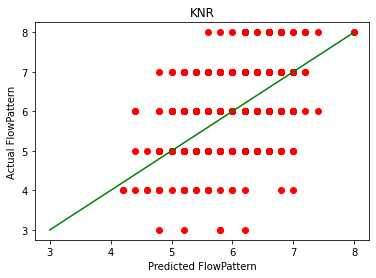

In [ ]:
models = []
models.append(('Linear', LinearRegression() )) 
models.append(('KNR', KNeighborsRegressor() ))
models.append(('LR', LogisticRegression(random_state=seed))) # default=’lbfgs’
models.append(('Ridge', RidgeClassifier(alpha=10)))
models.append(('kNN', KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', p=2)))

k4folds = 5
results = []
names = []
for name, modelName in models:
    modelName.fit(X_train, y_train)
    y_predicted = modelName.predict(X_test)
    y_actual = np.asarray(y_test)
    y_error = y_predicted - y_actual
    results.append(y_error)
    
    statement = " Method: %s \n Mean: %f (Standard deviation of %f)\n Max deviation: %f\n" % (name, y_error.mean(), y_error.std(), y_error.max())
    print(statement)
    LL = min([min(y_predicted), min(y_actual)])
    UR = max([max(y_predicted), max(y_actual)])
    plt.title(name)
    plt.plot(y_predicted, y_actual,'ro')
    plt.plot([LL,UR],[LL,UR], 'g-')
    plt.xlabel('Predicted FlowPattern')
    plt.ylabel('Actual FlowPattern')
    plt.show()
    
print('done \n')